In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("cancer.csv")

data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [41]:
x=data.iloc[:,1:31].values
y=data.iloc[:,31].values
print(data.shape)
print(data.groupby('diagnosis').size())

(569, 32)
diagnosis
B    357
M    212
dtype: int64


In [42]:
print(data.isna().sum())

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64


diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

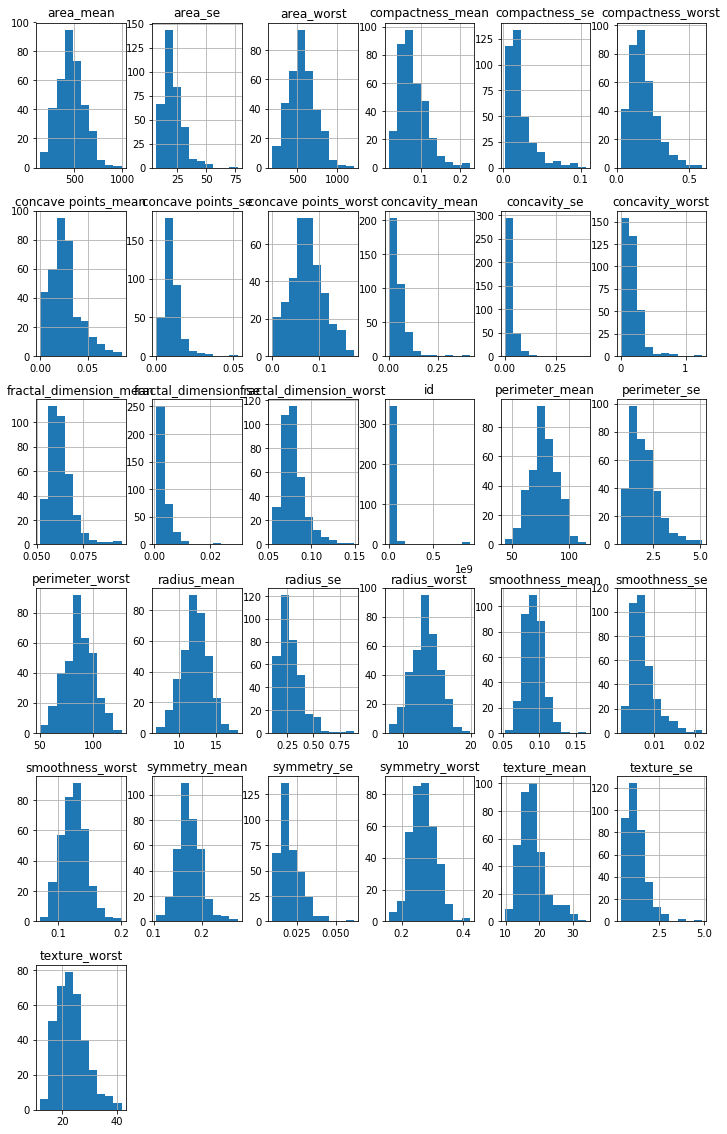

In [ ]:
data.groupby('diagnosis').hist(figsize=(12,20))

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
y_test=sc.transform(x_test)
x_test
y_test
x_train

array([[-0.71883452, -1.0127044 , -0.7245577 , ..., -0.2815459 ,
        -0.35881004, -0.34607992],
       [-0.30216665, -0.01934589, -0.37921906, ..., -1.54873267,
        -0.75672753, -1.24878553],
       [ 0.01101507,  0.25734302,  0.00800276, ...,  0.28247674,
        -0.58871793, -0.31697955],
       ...,
       [ 0.82801089,  1.1622518 ,  0.86897862, ...,  1.11762396,
         0.78896085,  2.96839375],
       [-0.03528136,  0.42063483, -0.09551981, ..., -0.52687039,
        -1.13342276, -0.4601059 ],
       [-0.30761329, -0.22119271, -0.37921906, ..., -0.96681402,
        -1.55609956, -1.32005176]])

In [27]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
print(classifier.fit(x_train,y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)


In [39]:
y_pred=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
#print(cm)
#print(cm[0,0]+cm[1,1])
#y_pred

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets